# EDA : Analyse Exploratoire des donn√©es


## Imports

In [73]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import os
import json
import cv2

from PIL import Image, ImageOps, ImageDraw, ImageFont
from config import *

## Meta Dataset Loading
Chargement du dataset

In [2]:
TACO_DATASET_ROOT_PATH = r"N:\My Drive\KESKIA Drive Mlamali\datasets\taco-2gb"

taco_meta_df = pd.read_csv(f'{TACO_DATASET_ROOT_PATH}/meta_df.csv')
taco_meta_df["path"] = taco_meta_df["img_file"].apply(lambda x: os.path.join(TACO_DATASET_ROOT_PATH, "data", x))
print(f"shape : {taco_meta_df.shape}")
taco_meta_df

shape : (4784, 14)


img_id  img_width  img_height            img_file  cat_id  \
0          0       1537        2049  batch_1/000006.jpg       6   
1          1       1537        2049  batch_1/000008.jpg      18   
2          1       1537        2049  batch_1/000008.jpg      14   
3          2       1537        2049  batch_1/000010.jpg       5   
4          2       1537        2049  batch_1/000010.jpg       7   
...      ...        ...         ...                 ...     ...   
4779    1498       1824        4000  batch_9/000098.jpg      16   
4780    1498       1824        4000  batch_9/000098.jpg       7   
4781    1499       1824        4000  batch_9/000099.jpg      39   
4782    1499       1824        4000  batch_9/000099.jpg      14   
4783    1499       1824        4000  batch_9/000099.jpg       6   

                   cat_name          supercategory  ann_id          x  \
0              Glass bottle                 Bottle       1   517.0000   
1               Meal carton                 Carton       2     1.0000   
2              Other carton                 Carton       3   531.0000   
3      Clear plastic bottle                 Bottle       4   632.0000   
4        Plastic bottle cap             Bottle cap       5   632.0000   
...                     ...                    ...     ...        ...   
4779           Drink carton                 Carton    4779   228.7143   
4780     Plastic bottle cap             Bottle cap    4780  1041.3334   
4781  Other plastic wrapper  Plastic bag & wrapper    4781   862.0274   
4782           Other carton                 Carton    4782   966.0000   
4783           Glass bottle                 Bottle    4783  1125.0000   

              y      width  height          area  \
0      127.0000   447.0000  1322.0  4.039540e+05   
1      457.0000  1429.0000  1519.0  1.071260e+06   
2      292.0000  1006.0000   672.0  9.958350e+04   
3      987.0000   500.0000   374.0  7.383250e+04   
4      989.0000    44.0000    51.0  9.150000e+02   
...         ...        ...     ...           ...   
4779  1550.0476  1007.9999   579.0  5.032469e+05   
4780  1721.7142   141.0000   138.0  1.449450e+04   
4781  1331.2500   505.9726   612.5  1.549541e+05   
4782  1996.0000   211.0000   336.0  2.867500e+04   
4783  1858.0000   234.0000   510.0  6.858950e+04   

                                                   path  
0     N:\My Drive\KESKIA Drive Mlamali\datasets\taco...  
1     N:\My Drive\KESKIA Drive Mlamali\datasets\taco...  
2     N:\My Drive\KESKIA Drive Mlamali\datasets\taco...  
3     N:\My Drive\KESKIA Drive Mlamali\datasets\taco...  
4     N:\My Drive\KESKIA Drive Mlamali\datasets\taco...  
...                                                 ...  
4779  N:\My Drive\KESKIA Drive Mlamali\datasets\taco...  
4780  N:\My Drive\KESKIA Drive Mlamali\datasets\taco...  
4781  N:\My Drive\KESKIA Drive Mlamali\datasets\taco...  
4782  N:\My Drive\KESKIA Drive Mlamali\datasets\taco...  
4783  N:\My Drive\KESKIA Drive Mlamali\datasets\taco...  

[4784 rows x 14 columns]

### Fuse annotations data with meta_df

In [3]:
annotation_path = f'{TACO_DATASET_ROOT_PATH}/data/annotations.json'
with open(annotation_path, 'r') as f:
    annotations = json.load(f)

print(f"keys : {annotations.keys()}")
annotations_dfs_dict = {k : pd.json_normalize(v) for k, v in annotations.items()}

keys : dict_keys(['info', 'images', 'annotations', 'scene_annotations', 'licenses', 'categories', 'scene_categories'])


In [4]:
annotations_dfs_dict["scene_categories"]

id                 name
0   0                Clean
1   1     Indoor, Man-made
2   2             Pavement
3   3  Sand, Dirt, Pebbles
4   4                Trash
5   5           Vegetation
6   6                Water

In [5]:
# rename columns image_id -> img_id
annotations_dfs_dict["scene_annotations"].rename(columns={"image_id": "img_id"}, inplace=True)
annotations_dfs_dict["scene_annotations"]

img_id background_ids
0          0            [1]
1          1            [1]
2          2            [2]
3          3            [5]
4          4            [5]
...      ...            ...
4291    1495         [5, 3]
4292    1496         [5, 3]
4293    1497            [2]
4294    1498            [2]
4295    1499            [5]

[4296 rows x 2 columns]

In [6]:
# join on "img_id"
pd.merge(taco_meta_df, annotations_dfs_dict["scene_annotations"], on="img_id", how="left")

img_id  img_width  img_height            img_file  cat_id  \
0           0       1537        2049  batch_1/000006.jpg       6   
1           1       1537        2049  batch_1/000008.jpg      18   
2           1       1537        2049  batch_1/000008.jpg      14   
3           2       1537        2049  batch_1/000010.jpg       5   
4           2       1537        2049  batch_1/000010.jpg       7   
...       ...        ...         ...                 ...     ...   
13490    1499       1824        4000  batch_9/000099.jpg      39   
13491    1499       1824        4000  batch_9/000099.jpg      14   
13492    1499       1824        4000  batch_9/000099.jpg      14   
13493    1499       1824        4000  batch_9/000099.jpg       6   
13494    1499       1824        4000  batch_9/000099.jpg       6   

                    cat_name          supercategory  ann_id          x  \
0               Glass bottle                 Bottle       1   517.0000   
1                Meal carton                 Carton       2     1.0000   
2               Other carton                 Carton       3   531.0000   
3       Clear plastic bottle                 Bottle       4   632.0000   
4         Plastic bottle cap             Bottle cap       5   632.0000   
...                      ...                    ...     ...        ...   
13490  Other plastic wrapper  Plastic bag & wrapper    4781   862.0274   
13491           Other carton                 Carton    4782   966.0000   
13492           Other carton                 Carton    4782   966.0000   
13493           Glass bottle                 Bottle    4783  1125.0000   
13494           Glass bottle                 Bottle    4783  1125.0000   

             y      width  height          area  \
0       127.00   447.0000  1322.0  4.039540e+05   
1       457.00  1429.0000  1519.0  1.071260e+06   
2       292.00  1006.0000   672.0  9.958350e+04   
3       987.00   500.0000   374.0  7.383250e+04   
4       989.00    44.0000    51.0  9.150000e+02   
...        ...        ...     ...           ...   
13490  1331.25   505.9726   612.5  1.549541e+05   
13491  1996.00   211.0000   336.0  2.867500e+04   
13492  1996.00   211.0000   336.0  2.867500e+04   
13493  1858.00   234.0000   510.0  6.858950e+04   
13494  1858.00   234.0000   510.0  6.858950e+04   

                                                    path background_ids  
0      N:\My Drive\KESKIA Drive Mlamali\datasets\taco...            [1]  
1      N:\My Drive\KESKIA Drive Mlamali\datasets\taco...            [1]  
2      N:\My Drive\KESKIA Drive Mlamali\datasets\taco...            [1]  
3      N:\My Drive\KESKIA Drive Mlamali\datasets\taco...            [2]  
4      N:\My Drive\KESKIA Drive Mlamali\datasets\taco...            [2]  
...                                                  ...            ...  
13490  N:\My Drive\KESKIA Drive Mlamali\datasets\taco...            [5]  
13491  N:\My Drive\KESKIA Drive Mlamali\datasets\taco...            [2]  
13492  N:\My Drive\KESKIA Drive Mlamali\datasets\taco...            [5]  
13493  N:\My Drive\KESKIA Drive Mlamali\datasets\taco...            [2]  
13494  N:\My Drive\KESKIA Drive Mlamali\datasets\taco...            [5]  

[13495 rows x 15 columns]

## Overview

#todo :
Number of super categories: 28
Number of categories: 60
Number of annotations: 4784
Number of images: 1500

In [7]:
taco_meta_df.columns

Index(['img_id', 'img_width', 'img_height', 'img_file', 'cat_id', 'cat_name',
       'supercategory', 'ann_id', 'x', 'y', 'width', 'height', 'area', 'path'],
      dtype='object')

In [8]:
taco_meta_df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4784 entries, 0 to 4783
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   img_id         4784 non-null   int64  
 1   img_width      4784 non-null   int64  
 2   img_height     4784 non-null   int64  
 3   img_file       4784 non-null   object 
 4   cat_id         4784 non-null   int64  
 5   cat_name       4784 non-null   object 
 6   supercategory  4784 non-null   object 
 7   ann_id         4784 non-null   int64  
 8   x              4784 non-null   float64
 9   y              4784 non-null   float64
 10  width          4784 non-null   float64
 11  height         4784 non-null   float64
 12  area           4784 non-null   float64
 13  path           4784 non-null   object 
dtypes: float64(5), int64(5), object(4)
memory usage: 523.4+ KB


## Stats

In [9]:
taco_meta_df.describe().T

count           mean            std         min      25%  \
img_id      4784.0     756.936037     445.884396    0.000000   354.75   
img_width   4784.0    2794.278428     714.851079  842.000000  2448.00   
img_height  4784.0    3234.358278     837.244672  474.000000  2448.00   
cat_id      4784.0      34.079013      20.081707    0.000000    12.00   
ann_id      4784.0    2391.949833    1381.264283    1.000000  1195.75   
x           4784.0    1232.285117     703.739763   -1.000000   741.60   
y           4784.0    1485.067894     826.005410   -1.316667   892.75   
width       4784.0     331.434419     440.431739   10.000000    68.00   
height      4784.0     320.246833     442.046602    4.000000    62.00   
area        4784.0  150407.154132  485084.750277   55.500000  2142.00   

                 50%        75%        max  
img_id        743.00   1154.000     1499.0  
img_width    2448.00   3264.000     6000.0  
img_height   3264.00   4000.000     5312.0  
cat_id         36.00     57.000       59.0  
ann_id       2392.50   3588.250     4783.0  
x            1150.00   1612.000     5573.0  
y            1414.00   1961.250     5208.0  
width         179.50    405.250     3758.0  
height        159.00    387.000     3995.0  
area        14244.75  75333.125  7328035.5

## Cleaning

### Missing Values
V√©rification si pr√©sence des valeurs manquantes

In [10]:
#Valeurs nulles
fig, ax = plt.subplots(figsize=(4, 1))
plt.title('Missing Values')
nans = taco_meta_df.isna().sum().sort_values(ascending=False).to_frame().T
sns.heatmap(nans, annot=True, fmt='d', cmap='BuGn')

<Axes: title={'center': 'Missing Values'}>

Remarque : Il n'y a pas de valeurs manquantes

### Duplicates

In [11]:
taco_meta_df.duplicated().sum()

0

In [12]:
subset = ['cat_name', 'supercategory', 'x', 'y', 'width', 'height', 'area']
taco_meta_df.duplicated(subset=subset).sum()

0

Remarque : Il n'y a pas de valeurs dupliqu√©es.

## Images

In [13]:
# img_id unique count
print(f"{taco_meta_df['img_file'].nunique()} uniques images")

1500 uniques images


In [14]:
print(f"{taco_meta_df['img_id'].nunique()} uniques img_id")

1500 uniques img_id


## Class Analysis

### Class "cat_name" Distribution

In [15]:
n_cat_name = taco_meta_df['cat_name'].nunique()
print(f"{n_cat_name} unique cat_name")
taco_meta_df['cat_name'].unique().tolist()

59 unique cat_name


['Glass bottle',
 'Meal carton',
 'Other carton',
 'Clear plastic bottle',
 'Plastic bottle cap',
 'Drink can',
 'Food Can',
 'Other plastic bottle',
 'Pop tab',
 'Aerosol',
 'Glass cup',
 'Other plastic wrapper',
 'Styrofoam piece',
 'Plastic film',
 'Other plastic',
 'Drink carton',
 'Metal bottle cap',
 'Disposable food container',
 'Normal paper',
 'Paper cup',
 'Cigarette',
 'Single-use carrier bag',
 'Tissues',
 'Toilet tube',
 'Crisp packet',
 'Plastic lid',
 'Metal lid',
 'Egg carton',
 'Plastic straw',
 'Paper bag',
 'Disposable plastic cup',
 'Broken glass',
 'Plastic utensils',
 'Glass jar',
 'Food waste',
 'Squeezable tube',
 'Spread tub',
 'Shoe',
 'Garbage bag',
 'Aluminium foil',
 'Six pack rings',
 'Foam cup',
 'Paper straw',
 'Corrugated carton',
 'Unlabeled litter',
 'Aluminium blister pack',
 'Battery',
 'Rope & strings',
 'Other plastic container',
 'Polypropylene bag',
 'Scrap metal',
 'Magazine paper',
 'Pizza box',
 'Plastic glooves',
 'Wrapping paper',
 'Carded 

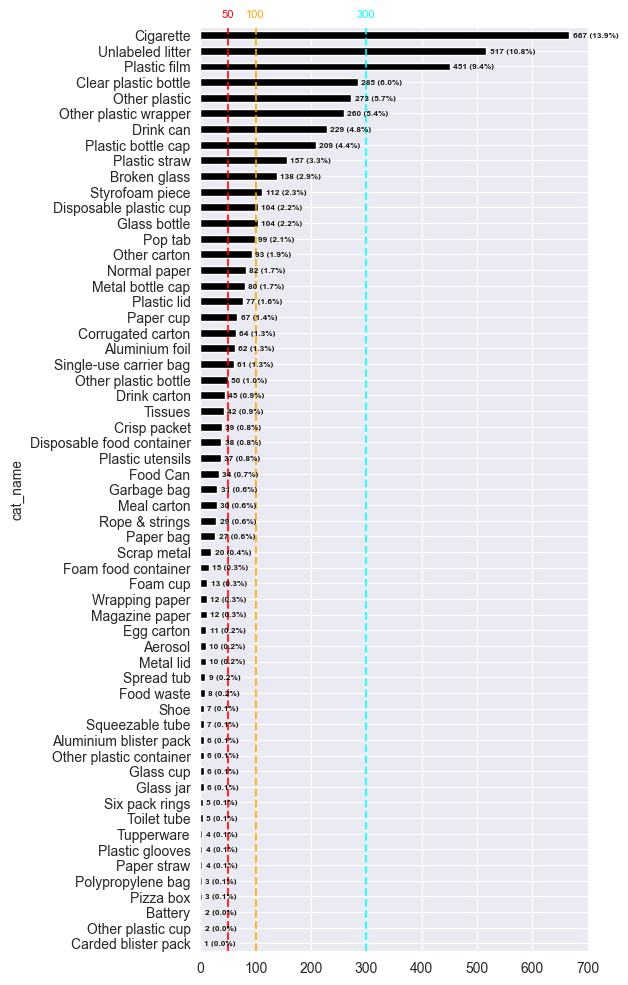

In [16]:
fig, ax = plt.subplots(figsize=(5, 12))
cat_name_counts = taco_meta_df['cat_name'].value_counts(ascending=True)

#print(cat_name_counts / cat_name_counts.sum() * 100)
cat_name_counts.plot(kind='barh', ax=ax, color='black')
# add % to the plot
for i, v in enumerate(cat_name_counts):
    ax.text(v + 6, i - 0.15, f"{v} ({v / cat_name_counts.sum():.1%})", color='black', fontweight='bold', fontsize=6,
            alpha=0.9)

for xc, color in zip([50, 100, 300], ['r', 'orange', 'cyan']):
    ax.text(xc, n_cat_name, str(xc), fontsize=8, color=color, va="bottom", ha="center")
    plt.axvline(x=xc, color=color, linestyle='--', alpha=0.8)

plt.show()

In [17]:
for cat, count in cat_name_counts.items():
    cat_id = CATNAME_2_CATIDX[cat]
    supercat = CATIDX_2_SUPERCATNAME[cat_id]
    print(f"{supercat} > {cat} ({EN_CATNAME_2_FR_CATNAME[cat]}) {CATNAME_2_EMOJI[cat]} : {count}")

Blister pack > Carded blister pack (Plaquette thermoform√©e √† carte) üíäüÉè : 1
Cup > Other plastic cup (Autre gobelet en plastique) ü•§ : 2
Battery > Battery (Batterie) üîã : 2
Carton > Pizza box (Bo√Æte √† pizza) üçïüì¶ : 3
Plastic bag & wrapper > Polypropylene bag (Sac en polypropyl√®ne) ‚ôªÔ∏è : 3
Straw > Paper straw (Paille en papier) ü•§ : 4
Plastic glooves > Plastic glooves (Gants en plastique) üß§ : 4
Plastic container > Tupperware (Tupperware) ü•° : 4
Carton > Toilet tube (Tube de papier toilette) üßª : 5
Plastic bag & wrapper > Six pack rings (Anneaux de canette) üç∫ : 5
Glass jar > Glass jar (Pot en verre) üçØ : 6
Cup > Glass cup (Tasse en verre) ü•É : 6
Plastic container > Other plastic container (Autre contenant en plastique) ‚ôªÔ∏è : 6
Blister pack > Aluminium blister pack (Plaquette thermoform√©e en aluminium) üíä : 6
Squeezable tube > Squeezable tube (Tube compressible) üß¥ : 7
Shoe > Shoe (Chaussure) üëü : 7
Food waste > Food waste (D√©chets alimentair

In [18]:
# display cat_name with count < 5
threadshold = 5
print(f"cat_names with count < {threadshold} : {cat_name_counts[cat_name_counts < threadshold].index.tolist()}")

cat_names with count < 5 : ['Carded blister pack', 'Other plastic cup', 'Battery', 'Pizza box', 'Polypropylene bag', 'Paper straw', 'Plastic glooves', 'Tupperware']


### Class "supercategory" Distribution

In [19]:
n_supercategory = taco_meta_df['supercategory'].nunique()
print(f"{n_supercategory} unique supercategory")
taco_meta_df['supercategory'].unique().tolist()

28 unique supercategory


['Bottle',
 'Carton',
 'Bottle cap',
 'Can',
 'Pop tab',
 'Cup',
 'Plastic bag & wrapper',
 'Styrofoam piece',
 'Other plastic',
 'Plastic container',
 'Paper',
 'Cigarette',
 'Lid',
 'Straw',
 'Paper bag',
 'Broken glass',
 'Plastic utensils',
 'Glass jar',
 'Food waste',
 'Squeezable tube',
 'Shoe',
 'Aluminium foil',
 'Unlabeled litter',
 'Blister pack',
 'Battery',
 'Rope & strings',
 'Scrap metal',
 'Plastic glooves']

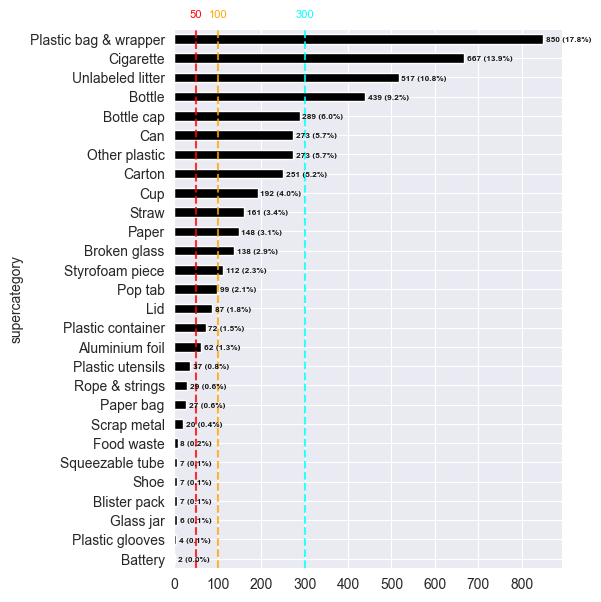

In [20]:
fig, ax = plt.subplots(figsize=(5, 7))
supercategory_counts = taco_meta_df['supercategory'].value_counts(ascending=True)

supercategory_counts.plot(kind='barh', ax=ax, color='black')
# add % to the plot
for i, v in enumerate(supercategory_counts):
    ax.text(v + 6, i - 0.15, f"{v} ({v / supercategory_counts.sum():.1%})", color='black', fontweight='bold', fontsize=6,
            alpha=0.9)

for xc, color in zip([50, 100, 300], ['r', 'orange', 'cyan']):
    ax.text(xc, n_supercategory, str(xc), fontsize=8, color=color, va="bottom", ha="center")
    plt.axvline(x=xc, color=color, linestyle='--', alpha=0.8)

plt.show()

In [21]:
# display supercategory with count < 5
threadshold = 10
print(f"supercategory with count < {threadshold} : {supercategory_counts[supercategory_counts < threadshold].index.tolist()}")


supercategory with count < 10 : ['Battery', 'Plastic glooves', 'Glass jar', 'Blister pack', 'Shoe', 'Squeezable tube', 'Food waste']


### Presence of "cat_name == 'Plastified paper bag'

On remarque qu'il n'y a aucun objet de type "Plastified paper bag" dans le dataset.
Pourtant, cette cat√©gorie est pr√©sente, avec un id unique : 35

In [22]:
# query example with cat_id == 35
taco_meta_df.query("cat_id == 35")

Empty DataFrame
Columns: [img_id, img_width, img_height, img_file, cat_id, cat_name, supercategory, ann_id, x, y, width, height, area, path]
Index: []

In [23]:
taco_meta_df.query("cat_name == 'Plastified paper bag'")

Empty DataFrame
Columns: [img_id, img_width, img_height, img_file, cat_id, cat_name, supercategory, ann_id, x, y, width, height, area, path]
Index: []

### Export mapping cat_name & supercategory

In [24]:
print(annotations_dfs_dict.keys())
annotations_dfs_dict["categories"]

dict_keys(['info', 'images', 'annotations', 'scene_annotations', 'licenses', 'categories', 'scene_categories'])


supercategory  id                       name
0          Aluminium foil   0             Aluminium foil
1                 Battery   1                    Battery
2            Blister pack   2     Aluminium blister pack
3            Blister pack   3        Carded blister pack
4                  Bottle   4       Other plastic bottle
5                  Bottle   5       Clear plastic bottle
6                  Bottle   6               Glass bottle
7              Bottle cap   7         Plastic bottle cap
8              Bottle cap   8           Metal bottle cap
9            Broken glass   9               Broken glass
10                    Can  10                   Food Can
11                    Can  11                    Aerosol
12                    Can  12                  Drink can
13                 Carton  13                Toilet tube
14                 Carton  14               Other carton
15                 Carton  15                 Egg carton
16                 Carton  16               Drink carton
17                 Carton  17          Corrugated carton
18                 Carton  18                Meal carton
19                 Carton  19                  Pizza box
20                    Cup  20                  Paper cup
21                    Cup  21     Disposable plastic cup
22                    Cup  22                   Foam cup
23                    Cup  23                  Glass cup
24                    Cup  24          Other plastic cup
25             Food waste  25                 Food waste
26              Glass jar  26                  Glass jar
27                    Lid  27                Plastic lid
28                    Lid  28                  Metal lid
29          Other plastic  29              Other plastic
30                  Paper  30             Magazine paper
31                  Paper  31                    Tissues
32                  Paper  32             Wrapping paper
33                  Paper  33               Normal paper
34              Paper bag  34                  Paper bag
35              Paper bag  35       Plastified paper bag
36  Plastic bag & wrapper  36               Plastic film
37  Plastic bag & wrapper  37             Six pack rings
38  Plastic bag & wrapper  38                Garbage bag
39  Plastic bag & wrapper  39      Other plastic wrapper
40  Plastic bag & wrapper  40     Single-use carrier bag
41  Plastic bag & wrapper  41          Polypropylene bag
42  Plastic bag & wrapper  42               Crisp packet
43      Plastic container  43                 Spread tub
44      Plastic container  44                 Tupperware
45      Plastic container  45  Disposable food container
46      Plastic container  46        Foam food container
47      Plastic container  47    Other plastic container
48        Plastic glooves  48            Plastic glooves
49       Plastic utensils  49           Plastic utensils
50                Pop tab  50                    Pop tab
51         Rope & strings  51             Rope & strings
52            Scrap metal  52                Scrap metal
53                   Shoe  53                       Shoe
54        Squeezable tube  54            Squeezable tube
55                  Straw  55              Plastic straw
56                  Straw  56                Paper straw
57        Styrofoam piece  57            Styrofoam piece
58       Unlabeled litter  58           Unlabeled litter
59              Cigarette  59                  Cigarette

 cat_id -> cat_name

In [25]:
cat_idx_2_cat_name = {row['id']: row['name'] for idx, row in annotations_dfs_dict["categories"].iterrows()}
cat_idx_2_cat_name

{0: 'Aluminium foil',
 1: 'Battery',
 2: 'Aluminium blister pack',
 3: 'Carded blister pack',
 4: 'Other plastic bottle',
 5: 'Clear plastic bottle',
 6: 'Glass bottle',
 7: 'Plastic bottle cap',
 8: 'Metal bottle cap',
 9: 'Broken glass',
 10: 'Food Can',
 11: 'Aerosol',
 12: 'Drink can',
 13: 'Toilet tube',
 14: 'Other carton',
 15: 'Egg carton',
 16: 'Drink carton',
 17: 'Corrugated carton',
 18: 'Meal carton',
 19: 'Pizza box',
 20: 'Paper cup',
 21: 'Disposable plastic cup',
 22: 'Foam cup',
 23: 'Glass cup',
 24: 'Other plastic cup',
 25: 'Food waste',
 26: 'Glass jar',
 27: 'Plastic lid',
 28: 'Metal lid',
 29: 'Other plastic',
 30: 'Magazine paper',
 31: 'Tissues',
 32: 'Wrapping paper',
 33: 'Normal paper',
 34: 'Paper bag',
 35: 'Plastified paper bag',
 36: 'Plastic film',
 37: 'Six pack rings',
 38: 'Garbage bag',
 39: 'Other plastic wrapper',
 40: 'Single-use carrier bag',
 41: 'Polypropylene bag',
 42: 'Crisp packet',
 43: 'Spread tub',
 44: 'Tupperware',
 45: 'Disposable 

In [26]:
print(CATNAME_2_EMOJI)

{'Aluminium foil': 'üî©', 'Battery': 'üîã', 'Aluminium blister pack': 'üíä', 'Carded blister pack': 'üíäüÉè', 'Other plastic bottle': 'üß¥', 'Clear plastic bottle': 'üß¥', 'Glass bottle': 'üçæ', 'Plastic bottle cap': 'üîò', 'Metal bottle cap': 'üîò', 'Broken glass': 'üî®', 'Food Can': 'ü•´', 'Aerosol': 'üé®', 'Drink can': 'ü•§', 'Toilet tube': 'üßª', 'Other carton': 'üì¶', 'Egg carton': 'ü•öüì¶', 'Drink carton': 'üßÉ', 'Corrugated carton': 'üì¶', 'Meal carton': 'üç±', 'Pizza box': 'üçïüì¶', 'Paper cup': 'ü•§', 'Disposable plastic cup': 'ü•§', 'Foam cup': '‚òï', 'Glass cup': 'ü•É', 'Other plastic cup': 'ü•§', 'Food waste': 'üçΩÔ∏èüóëÔ∏è', 'Glass jar': 'üçØ', 'Plastic lid': 'üîò', 'Metal lid': 'üîò', 'Other plastic': '‚ôªÔ∏è', 'Magazine paper': 'üì∞', 'Tissues': 'ü§ß', 'Wrapping paper': 'üéÅ', 'Normal paper': 'üìÑ', 'Paper bag': 'üõçÔ∏è', 'Plastified paper bag': 'üõçÔ∏è', 'Plastic film': '‚ôªÔ∏è', 'Six pack rings': 'üç∫', 'Garbage bag': 'üóëÔ∏è', '

cat_id -> supercategory

In [27]:
cat_idx_2_supercat_name = {row['id']: row['supercategory'] for idx, row in annotations_dfs_dict["categories"].iterrows()}
cat_idx_2_supercat_name

{0: 'Aluminium foil',
 1: 'Battery',
 2: 'Blister pack',
 3: 'Blister pack',
 4: 'Bottle',
 5: 'Bottle',
 6: 'Bottle',
 7: 'Bottle cap',
 8: 'Bottle cap',
 9: 'Broken glass',
 10: 'Can',
 11: 'Can',
 12: 'Can',
 13: 'Carton',
 14: 'Carton',
 15: 'Carton',
 16: 'Carton',
 17: 'Carton',
 18: 'Carton',
 19: 'Carton',
 20: 'Cup',
 21: 'Cup',
 22: 'Cup',
 23: 'Cup',
 24: 'Cup',
 25: 'Food waste',
 26: 'Glass jar',
 27: 'Lid',
 28: 'Lid',
 29: 'Other plastic',
 30: 'Paper',
 31: 'Paper',
 32: 'Paper',
 33: 'Paper',
 34: 'Paper bag',
 35: 'Paper bag',
 36: 'Plastic bag & wrapper',
 37: 'Plastic bag & wrapper',
 38: 'Plastic bag & wrapper',
 39: 'Plastic bag & wrapper',
 40: 'Plastic bag & wrapper',
 41: 'Plastic bag & wrapper',
 42: 'Plastic bag & wrapper',
 43: 'Plastic container',
 44: 'Plastic container',
 45: 'Plastic container',
 46: 'Plastic container',
 47: 'Plastic container',
 48: 'Plastic glooves',
 49: 'Plastic utensils',
 50: 'Pop tab',
 51: 'Rope & strings',
 52: 'Scrap metal',
 

supercat_idx -> supercategory_name

In [28]:
supercat_idx_2_supercat_name = {i : supercat_name for i, supercat_name in enumerate(annotations_dfs_dict["categories"]['supercategory'].unique().tolist())}
supercat_idx_2_supercat_name 

{0: 'Aluminium foil',
 1: 'Battery',
 2: 'Blister pack',
 3: 'Bottle',
 4: 'Bottle cap',
 5: 'Broken glass',
 6: 'Can',
 7: 'Carton',
 8: 'Cup',
 9: 'Food waste',
 10: 'Glass jar',
 11: 'Lid',
 12: 'Other plastic',
 13: 'Paper',
 14: 'Paper bag',
 15: 'Plastic bag & wrapper',
 16: 'Plastic container',
 17: 'Plastic glooves',
 18: 'Plastic utensils',
 19: 'Pop tab',
 20: 'Rope & strings',
 21: 'Scrap metal',
 22: 'Shoe',
 23: 'Squeezable tube',
 24: 'Straw',
 25: 'Styrofoam piece',
 26: 'Unlabeled litter',
 27: 'Cigarette'}

### Linked Graph

In [29]:
print(annotations_dfs_dict.keys())
annotations_dfs_dict["categories"]["fr_name"] = annotations_dfs_dict["categories"]["name"].apply(lambda x: EN_CATNAME_2_FR_CATNAME[x])
annotations_dfs_dict["categories"]["fr_supername"] = annotations_dfs_dict["categories"]["supercategory"].apply(lambda x: EN_SUPERCATNAME_2_FR_SUPERCATNAME[x])
annotations_dfs_dict["categories"]

dict_keys(['info', 'images', 'annotations', 'scene_annotations', 'licenses', 'categories', 'scene_categories'])


supercategory  id                       name
0          Aluminium foil   0             Aluminium foil
1                 Battery   1                    Battery
2            Blister pack   2     Aluminium blister pack
3            Blister pack   3        Carded blister pack
4                  Bottle   4       Other plastic bottle
5                  Bottle   5       Clear plastic bottle
6                  Bottle   6               Glass bottle
7              Bottle cap   7         Plastic bottle cap
8              Bottle cap   8           Metal bottle cap
9            Broken glass   9               Broken glass
10                    Can  10                   Food Can
11                    Can  11                    Aerosol
12                    Can  12                  Drink can
13                 Carton  13                Toilet tube
14                 Carton  14               Other carton
15                 Carton  15                 Egg carton
16                 Carton  16               Drink carton
17                 Carton  17          Corrugated carton
18                 Carton  18                Meal carton
19                 Carton  19                  Pizza box
20                    Cup  20                  Paper cup
21                    Cup  21     Disposable plastic cup
22                    Cup  22                   Foam cup
23                    Cup  23                  Glass cup
24                    Cup  24          Other plastic cup
25             Food waste  25                 Food waste
26              Glass jar  26                  Glass jar
27                    Lid  27                Plastic lid
28                    Lid  28                  Metal lid
29          Other plastic  29              Other plastic
30                  Paper  30             Magazine paper
31                  Paper  31                    Tissues
32                  Paper  32             Wrapping paper
33                  Paper  33               Normal paper
34              Paper bag  34                  Paper bag
35              Paper bag  35       Plastified paper bag
36  Plastic bag & wrapper  36               Plastic film
37  Plastic bag & wrapper  37             Six pack rings
38  Plastic bag & wrapper  38                Garbage bag
39  Plastic bag & wrapper  39      Other plastic wrapper
40  Plastic bag & wrapper  40     Single-use carrier bag
41  Plastic bag & wrapper  41          Polypropylene bag
42  Plastic bag & wrapper  42               Crisp packet
43      Plastic container  43                 Spread tub
44      Plastic container  44                 Tupperware
45      Plastic container  45  Disposable food container
46      Plastic container  46        Foam food container
47      Plastic container  47    Other plastic container
48        Plastic glooves  48            Plastic glooves
49       Plastic utensils  49           Plastic utensils
50                Pop tab  50                    Pop tab
51         Rope & strings  51             Rope & strings
52            Scrap metal  52                Scrap metal
53                   Shoe  53                       Shoe
54        Squeezable tube  54            Squeezable tube
55                  Straw  55              Plastic straw
56                  Straw  56                Paper straw
57        Styrofoam piece  57            Styrofoam piece
58       Unlabeled litter  58           Unlabeled litter
59              Cigarette  59                  Cigarette

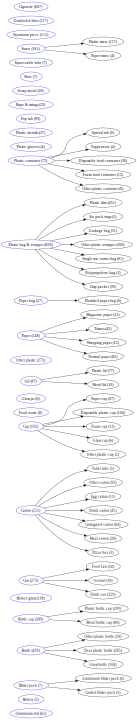

In [51]:
from graphviz import Digraph

import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'
# Note: graphviz may require more than pip installation due to path issue: e.g. brew install graphviz for mac

#g = Digraph('G', filename='hello.gv')
dot = Digraph('Dataset graph', filename='outputs/categories_graph.gv')
dot.attr(rankdir='LR', size='8,10')

for i,cat_it in annotations_dfs_dict["categories"].iterrows():
    cat_name = cat_it['name']
    supercat_name = cat_it['supercategory']
    
    if cat_name in cat_name_counts:
        cat_count = cat_name_counts[cat_name]
    else:
        cat_count = 0
        
    if supercat_name in supercategory_counts:
        supercat_count = supercategory_counts[supercat_name]
    else:
        supercat_count = 0

    dot.node(f'{cat_it["name"]}', label=f'{cat_it["name"]} ({cat_count})')
    if cat_name==supercat_name:
        dot.node(supercat_name, label=f'{supercat_name} ({supercat_count})', color='blue')
    else:
        dot.node(supercat_name, label=f'{supercat_name} ({supercat_count})', color='blue')
        dot.edge(supercat_name, cat_name)


dot.save()
dot.view(quiet_view=True)
dot

## Scene Distribution

#todo, impact de la scene sur yolo 
scene c'est important ? rappel de comment fonctionne yolo

## Width & Height Distribution

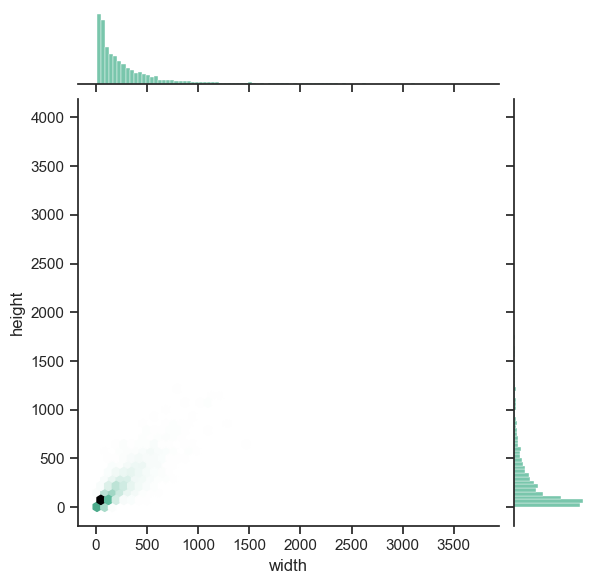

In [31]:
sns.set_theme(style="ticks")
sns.jointplot(x="width", y="height", data=taco_meta_df, kind="hex", color="#4CB391")

## Aera

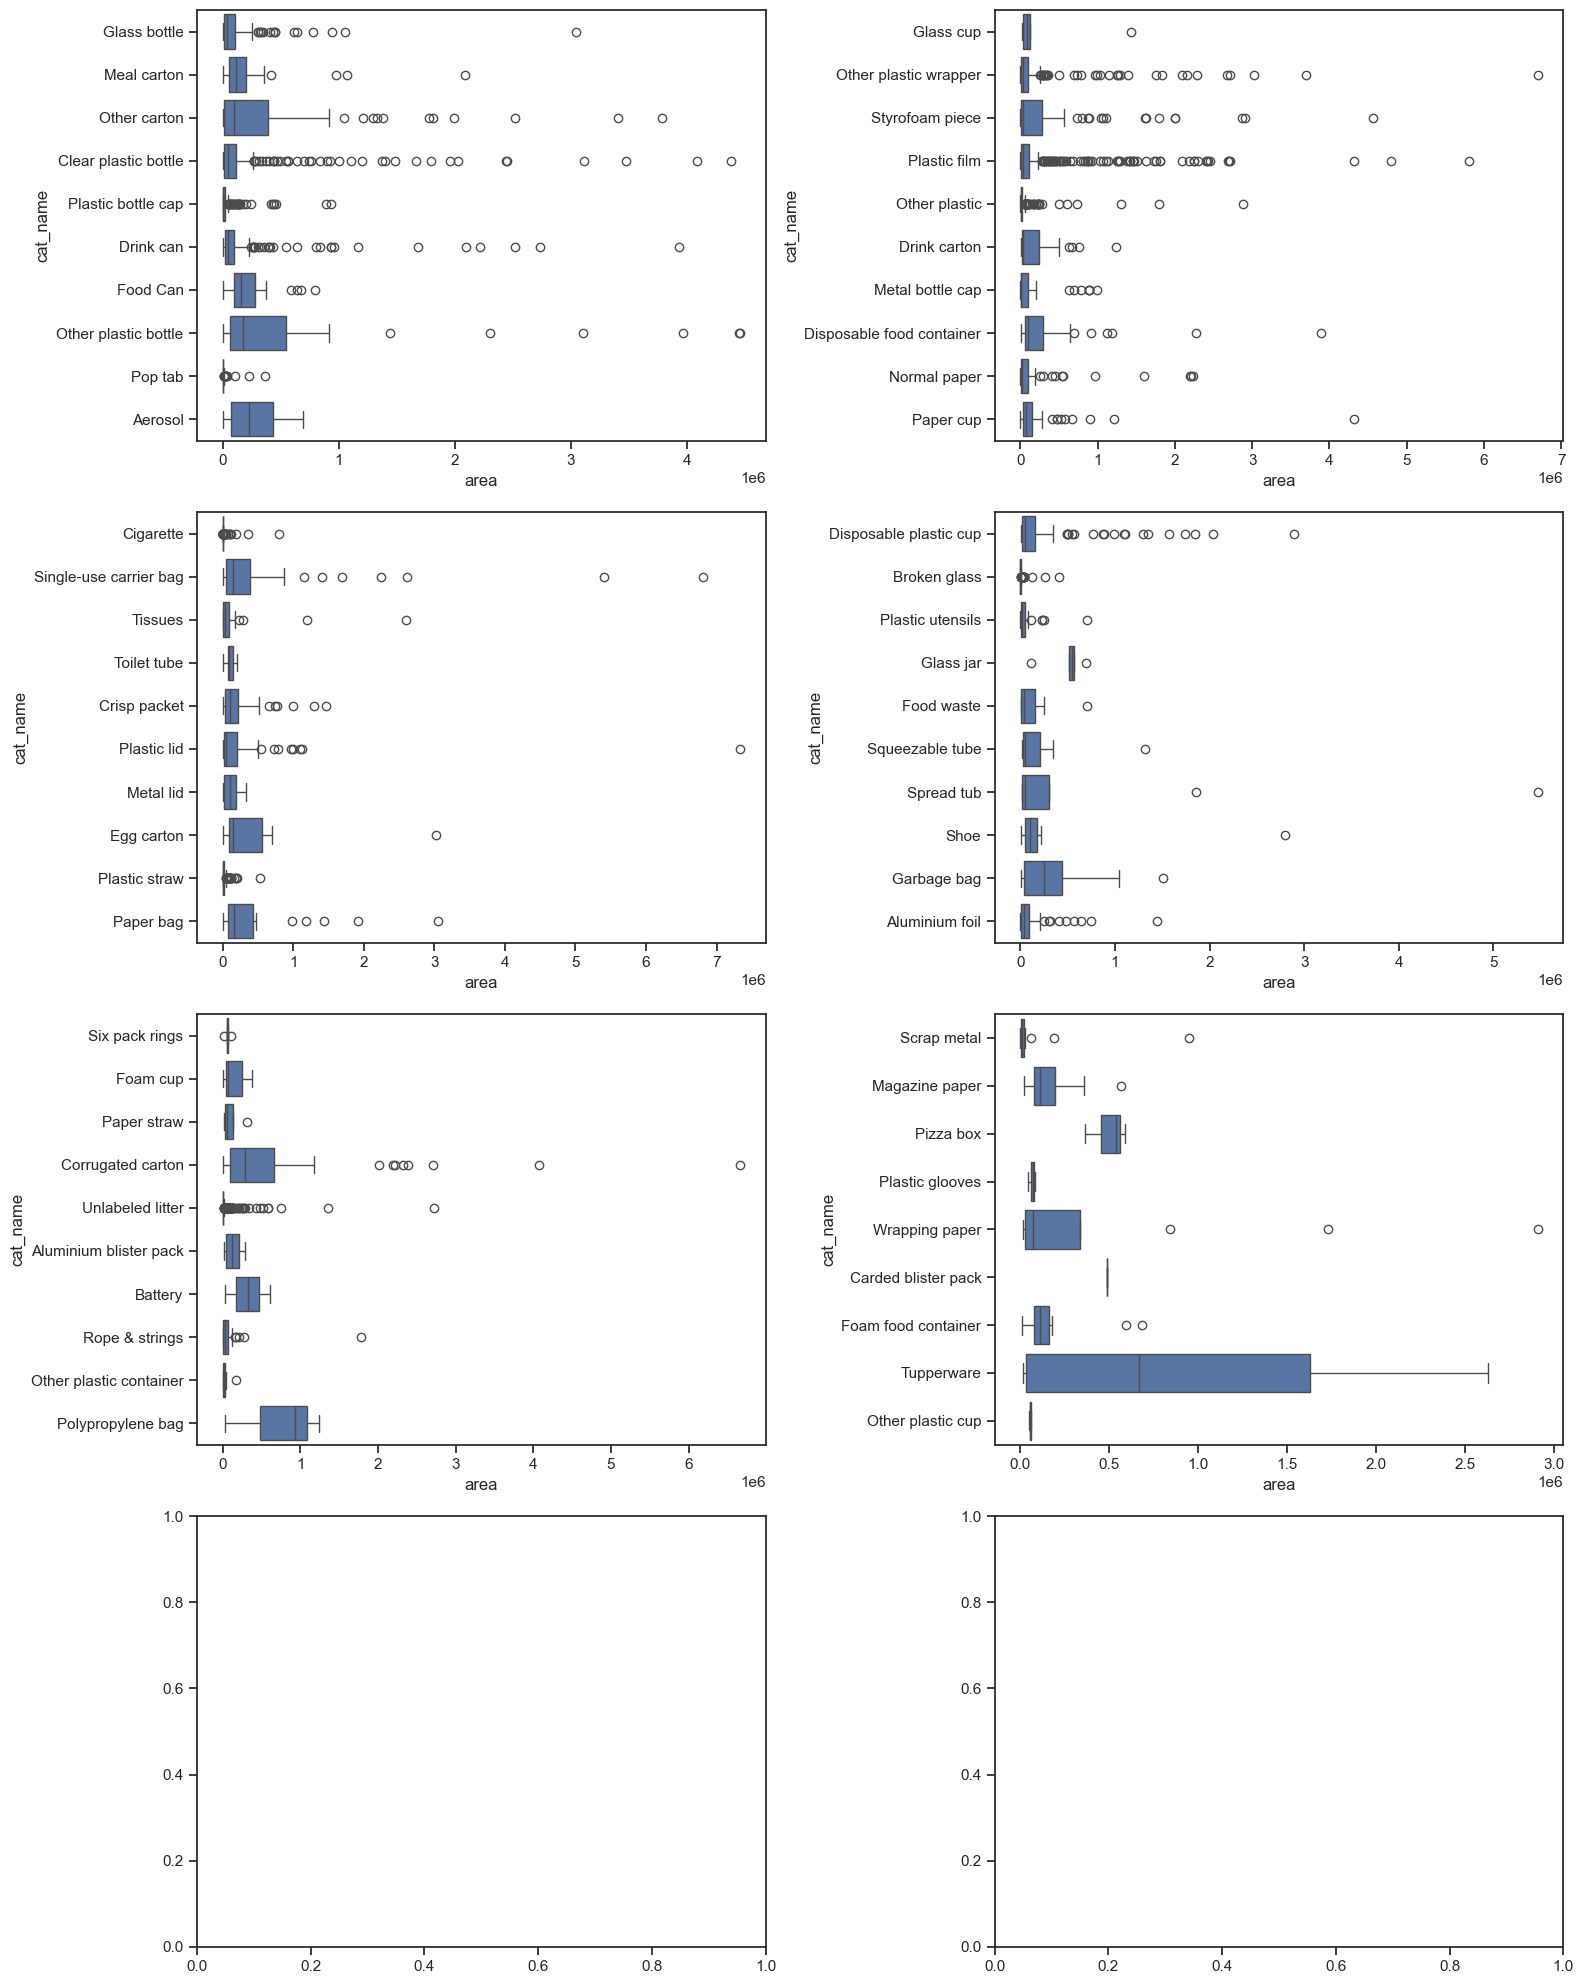

In [64]:
# list to [[], [], []] (chunk)
def chunk_list(l, n):
    for i in range(0, len(l), n):
        yield l[i:i + n]

# chunk cat_name
cat_names_group : list = list(chunk_list(taco_meta_df['cat_name'].unique().tolist(), 10))
# area boxplot by category
# multiple plot
n_cols = 2
n_rows = len(cat_names_group) // n_cols + 1

# create figure and axes
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(8*n_cols, 20))
# flatten axes
axes = axes.flatten()
# loop over cat_name
for i, cat_names in enumerate(cat_names_group):
    df = taco_meta_df[taco_meta_df['cat_name'].isin(cat_names)]
    sns.boxplot(x="area", y="cat_name", data=df, ax=axes[i])
    axes[i].set_xlabel("area")
    axes[i].set_ylabel("cat_name")
    
plt.tight_layout()
plt.show()



## Sample Images Visualization

### 'Unlabeled litter' sample images

Regardons quelques images de la cat√©gorie 'Unlabeled litter' (D√©chets non √©tiquet√©s)

<img src="outputs/eda/samples-overview/taco-base-gif/cat_name/Unlabeled litter.gif" width="800" height="800" />
